In [94]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [71]:
players = pd.read_csv('male_players (legacy).csv')
players

/var/folders/cw/zmq0w11x4pb_vc18zyn4yd880000gn/T/ipykernel_60161/252853704.py:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv('male_players (legacy).csv')


,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,269011,/player/269011/ziye-zhao/230002,23,2,2022-09-26,Zhao Ziye,赵梓业,RW,46,61,...,32+2,32+2,37+2,36+2,31+2,31+2,31+2,36+2,14+2,https://cdn.sofifa.net/players/269/011/23_120.png
161579,269019,/player/269019/junjie-wu/230002,23,2,2022-09-26,Wu Junjie,吴俊杰,LB,46,58,...,41+2,41+2,43+2,44+2,48+2,48+2,48+2,44+2,15+2,https://cdn.sofifa.net/players/269/019/23_120.png
161580,271093,/player/271093/kailin-barlow/230002,23,2,2022-09-26,K. Barlow,Kailin Barlow,CDM,46,58,...,45+2,45+2,47+2,47+2,46+2,46+2,46+2,47+2,14+2,https://cdn.sofifa.net/players/271/093/23_120.png
161581,271555,/player/271555/gideon-tetteh/230002,23,2,2022-09-26,G. Tetteh,Gideon Tetteh,"RW, LW",46,70,...,30+2,30+2,34+2,32+2,28+2,28+2,28+2,32+2,15+2,https://cdn.sofifa.net/players/271/555/23_120.png


In [72]:
columns = ['player_id','fifa_version','short_name','player_positions','overall','potential','value_eur','wage_eur','age']
players_df = players.loc[players['fifa_version']==23]
players_df = players_df[columns]
players_df

,player_id,fifa_version,short_name,player_positions,overall,potential,value_eur,wage_eur,age
143050,158023,23,L. Messi,RW,91,91,54000000.0,195000.0,35
143051,165153,23,K. Benzema,"CF, ST",91,91,64000000.0,450000.0,34
143052,188545,23,R. Lewandowski,ST,91,91,84000000.0,420000.0,33
143053,192985,23,K. De Bruyne,"CM, CAM",91,91,107500000.0,350000.0,31
143054,231747,23,K. Mbappé,"ST, LW",91,95,190500000.0,230000.0,23
...,...,...,...,...,...,...,...,...,...
161578,269011,23,Zhao Ziye,RW,46,61,110000.0,700.0,18
161579,269019,23,Wu Junjie,LB,46,58,110000.0,750.0,19
161580,271093,23,K. Barlow,CDM,46,58,110000.0,500.0,19
161581,271555,23,G. Tetteh,"RW, LW",46,70,150000.0,500.0,17


In [88]:
player_name_map = {}
for player_id,name in zip(players_df['player_id'], players_df['short_name']):
    player_name_map[player_id] = name


In [73]:
players_df.isnull().sum()

player_id            0
fifa_version         0
short_name           0
player_positions     0
overall              0
potential            0
value_eur           89
wage_eur            78
age                  0
dtype: int64

In [74]:
features = ['overall','potential','value_eur','wage_eur','age']
players_df = players_df.dropna(subset=features)
data = players_df.drop(['fifa_version','short_name','player_positions'], axis=1).set_index('player_id')
data

,overall,potential,value_eur,wage_eur,age
player_id,,,,,
158023,91,91,54000000.0,195000.0,35
165153,91,91,64000000.0,450000.0,34
188545,91,91,84000000.0,420000.0,33
192985,91,91,107500000.0,350000.0,31
231747,91,95,190500000.0,230000.0,23
...,...,...,...,...,...
269011,46,61,110000.0,700.0,18
269019,46,58,110000.0,750.0,19
271093,46,58,110000.0,500.0,19


In [41]:
data = (data.subtract(data.min()).divide(data.max()-data.min())*9) + 1
data

,overall,potential,value_eur,wage_eur,age
player_id,,,,,
158023,10.0,9.234043,3.550876,4.894327,7.107143
165153,10.0,9.234043,4.023340,10.000000,6.785714
188545,10.0,9.234043,4.968266,9.399333,6.464286
192985,10.0,9.234043,6.078555,7.997775,5.821429
231747,10.0,10.000000,10.000000,5.595106,3.250000
...,...,...,...,...,...
269011,1.0,3.489362,1.004772,1.004004,1.642857
269019,1.0,2.914894,1.004772,1.005006,1.964286
271093,1.0,2.914894,1.004772,1.000000,1.964286


In [51]:
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(data)
labels

array([2, 2, 2, ..., 3, 3, 3], dtype=int32)

In [65]:
centroids = kmeans.cluster_centers_
centroids

array([[6.10169875, 5.55389027, 1.10228344, 1.22734717, 5.69019981],
       [4.95705409, 6.09007559, 1.07989742, 1.08278478, 2.90237312],
       [7.33022432, 7.36165189, 1.88486886, 1.93793294, 4.0488278 ],
       [3.10034965, 4.65944428, 1.01668375, 1.01455522, 2.4933504 ],
       [4.57190542, 4.20405113, 1.027874  , 1.04174736, 5.06889529]])

In [57]:
player_cluster_df = pd.DataFrame(labels, index=data.index, columns=['cluster'])
player_cluster_df

,cluster
player_id,
158023,2
165153,2
188545,2
192985,2
231747,2
...,...
269011,3
269019,3
271093,3


In [104]:
player_cluster_df['cluster'].value_counts()


1    5468
4    4315
0    3524
3    3440
2    1697
Name: cluster, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '4'),
  Text(2, 0, '0'),
  Text(3, 0, '3'),
  Text(4, 0, '2')])

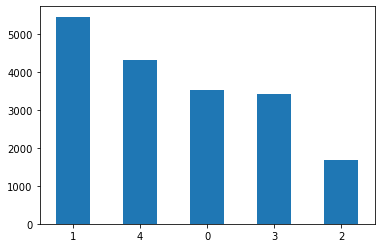

In [119]:
player_cluster_df['cluster'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

In [123]:
pd.DataFrame(centroids, columns=features).T


,0,1,2,3,4
overall,6.101699,4.957054,7.330224,3.100350,4.571905
potential,5.553890,6.090076,7.361652,4.659444,4.204051
value_eur,1.102283,1.079897,1.884869,1.016684,1.027874
wage_eur,1.227347,1.082785,1.937933,1.014555,1.041747
age,5.690200,2.902373,4.048828,2.493350,5.068895


In [122]:
for cluster,players in player_cluster_df.groupby("cluster"):
    print("Cluster:", cluster, "Size:", players.shape[0])
    for p_id in players.sample(5).index:
     
        print("\t", p_id, player_name_map[p_id])

Cluster: 0 Size: 3524
	 190982 Alberto Perea
	 204542 Y. Yotún
	 187072 L. Stindl
	 159145 B. Gomis
	 221551 E. Mammana
Cluster: 1 Size: 5468
	 247391 Andre Shinyashiki
	 264763 F. Chiarodia
	 240283 V. Vorel
	 263694 R. Montes
	 264337 Rodrigo Muniz
Cluster: 2 Size: 1697
	 232432 L. Jović
	 255533 Y. Ndayishimiye
	 230918 T. Chalobah
	 199434 D. Tadić
	 243282 D. McNeil
Cluster: 3 Size: 3440
	 263417 P. Joly
	 269995 Y. Fawaz
	 239320 B. House
	 254792 M. Al Mahasna
	 257809 A. Oroian
Cluster: 4 Size: 4315
	 215361 D. Voltan
	 244375 O. Andrievskyi
	 242716 C. Baird
	 192439 M. Davidson
	 235236 I. Jebali
